In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
arts_data = pd.read_csv('Bases/arts_bi_unificado.csv')

In [4]:
arts_data

,ART,Address,Start Date,Payment Date,Title
0,12800000.0,Rua CONCEICAO Nº 1050 - CEP 93025630,25/07/2023,28/09/2023,ENGENHEIRO MECÂNICO
1,12800001.0,Rua HUGO SCHAUMHÖFFEL - CEP 95672150,27/09/2023,28/09/2023,ENGENHEIRO AGRÔNOMO
2,12800002.0,Rua DONA AMÁLIA Nº 81 - CEP 98804615,04/08/2023,27/09/2023,ENGENHEIRO CIVIL
3,12800003.0,Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...,27/10/2023,28/09/2023,ENGENHEIRO CIVIL
4,12800004.0,Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 - C...,27/09/2023,28/09/2023,ENGENHEIRO CIVIL
...,...,...,...,...,...
463218,13622492.0,Estrada JOÃO DE OLIVEIRA REMIÃO Nº 5110 - CEP ...,04/12/2024,07/02/2025,ENGENHEIRO MECÂNICO
463219,13622495.0,Rua BARÃO DE SANTO ÂNGELO Nº 389 - CEP 90570090,05/02/2025,10/02/2025,ENGENHEIRO CIVIL
463220,13622497.0,Avenida R. RICHARD SAUR Nº 40 Complemento SALA...,10/02/2025,20/02/2025,ENGENHEIRO MECÂNICO
463221,13622498.0,Distrito INTERIOR Complemento interior - CEP 9...,01/02/2025,06/02/2025,ENGENHEIRO AGRÔNOMO


In [5]:
for coluna in arts_data.columns:
    duplicados = arts_data[coluna].duplicated(keep=False).sum()
    print(f"Coluna '{coluna}' tem {duplicados} valores duplicados.")

Coluna 'ART' tem 92 valores duplicados.
Coluna 'Address' tem 182679 valores duplicados.
Coluna 'Start Date' tem 462444 valores duplicados.
Coluna 'Payment Date' tem 463213 valores duplicados.
Coluna 'Title' tem 463212 valores duplicados.


In [6]:
print(arts_data.isnull().sum())

ART             1
Address         0
Start Date      0
Payment Date    0
Title           0
dtype: int64


In [7]:
arts_data = arts_data[arts_data['ART'].notnull()]
print(arts_data.isnull().sum())

ART             0
Address         0
Start Date      0
Payment Date    0
Title           0
dtype: int64


In [8]:
arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')
arts_data['Payment Date'] = pd.to_datetime(arts_data['Payment Date'], errors='coerce')
arts_data

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\2447227608.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')
C:\Users\celso\AppData\Local\Temp\ipykernel_20392\2447227608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')
C:\Users\celso\AppData\Local\Temp\ipykernel_20392\2447227608.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  arts_data['Paymen

,ART,Address,Start Date,Payment Date,Title
0,12800000.0,Rua CONCEICAO Nº 1050 - CEP 93025630,2023-07-25,2023-09-28,ENGENHEIRO MECÂNICO
1,12800001.0,Rua HUGO SCHAUMHÖFFEL - CEP 95672150,2023-09-27,2023-09-28,ENGENHEIRO AGRÔNOMO
2,12800002.0,Rua DONA AMÁLIA Nº 81 - CEP 98804615,2023-08-04,2023-09-27,ENGENHEIRO CIVIL
3,12800003.0,Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...,2023-10-27,2023-09-28,ENGENHEIRO CIVIL
4,12800004.0,Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 - C...,2023-09-27,2023-09-28,ENGENHEIRO CIVIL
...,...,...,...,...,...
463218,13622492.0,Estrada JOÃO DE OLIVEIRA REMIÃO Nº 5110 - CEP ...,2024-12-04,2025-02-07,ENGENHEIRO MECÂNICO
463219,13622495.0,Rua BARÃO DE SANTO ÂNGELO Nº 389 - CEP 90570090,2025-02-05,2025-02-10,ENGENHEIRO CIVIL
463220,13622497.0,Avenida R. RICHARD SAUR Nº 40 Complemento SALA...,2025-02-10,2025-02-20,ENGENHEIRO MECÂNICO
463221,13622498.0,Distrito INTERIOR Complemento interior - CEP 9...,2025-02-01,2025-02-06,ENGENHEIRO AGRÔNOMO


In [9]:
arts_data['ART'] = arts_data['ART'].astype('int64')
arts_data['Title'] = arts_data['Title'].astype('category')

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\1021431434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['ART'] = arts_data['ART'].astype('int64')
C:\Users\celso\AppData\Local\Temp\ipykernel_20392\1021431434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Title'] = arts_data['Title'].astype('category')


In [10]:
arts_data

,ART,Address,Start Date,Payment Date,Title
0,12800000,Rua CONCEICAO Nº 1050 - CEP 93025630,2023-07-25,2023-09-28,ENGENHEIRO MECÂNICO
1,12800001,Rua HUGO SCHAUMHÖFFEL - CEP 95672150,2023-09-27,2023-09-28,ENGENHEIRO AGRÔNOMO
2,12800002,Rua DONA AMÁLIA Nº 81 - CEP 98804615,2023-08-04,2023-09-27,ENGENHEIRO CIVIL
3,12800003,Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...,2023-10-27,2023-09-28,ENGENHEIRO CIVIL
4,12800004,Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 - C...,2023-09-27,2023-09-28,ENGENHEIRO CIVIL
...,...,...,...,...,...
463218,13622492,Estrada JOÃO DE OLIVEIRA REMIÃO Nº 5110 - CEP ...,2024-12-04,2025-02-07,ENGENHEIRO MECÂNICO
463219,13622495,Rua BARÃO DE SANTO ÂNGELO Nº 389 - CEP 90570090,2025-02-05,2025-02-10,ENGENHEIRO CIVIL
463220,13622497,Avenida R. RICHARD SAUR Nº 40 Complemento SALA...,2025-02-10,2025-02-20,ENGENHEIRO MECÂNICO
463221,13622498,Distrito INTERIOR Complemento interior - CEP 9...,2025-02-01,2025-02-06,ENGENHEIRO AGRÔNOMO


In [11]:
import unicodedata
# Remover acentos de Title
def remover_acentos(texto):
    if pd.isnull(texto):
        return texto
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')

arts_data['Title'] = arts_data['Title'].str.strip().str.lower().apply(remover_acentos)

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\2385284088.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Title'] = arts_data['Title'].str.strip().str.lower().apply(remover_acentos)


In [12]:
arts_data

,ART,Address,Start Date,Payment Date,Title
0,12800000,Rua CONCEICAO Nº 1050 - CEP 93025630,2023-07-25,2023-09-28,engenheiro mecanico
1,12800001,Rua HUGO SCHAUMHÖFFEL - CEP 95672150,2023-09-27,2023-09-28,engenheiro agronomo
2,12800002,Rua DONA AMÁLIA Nº 81 - CEP 98804615,2023-08-04,2023-09-27,engenheiro civil
3,12800003,Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...,2023-10-27,2023-09-28,engenheiro civil
4,12800004,Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 - C...,2023-09-27,2023-09-28,engenheiro civil
...,...,...,...,...,...
463218,13622492,Estrada JOÃO DE OLIVEIRA REMIÃO Nº 5110 - CEP ...,2024-12-04,2025-02-07,engenheiro mecanico
463219,13622495,Rua BARÃO DE SANTO ÂNGELO Nº 389 - CEP 90570090,2025-02-05,2025-02-10,engenheiro civil
463220,13622497,Avenida R. RICHARD SAUR Nº 40 Complemento SALA...,2025-02-10,2025-02-20,engenheiro mecanico
463221,13622498,Distrito INTERIOR Complemento interior - CEP 9...,2025-02-01,2025-02-06,engenheiro agronomo


In [13]:
# Mostra algumas linhas que têm 'CEP' na string
exemplos_cep = arts_data[arts_data['Address'].str.contains('CEP', na=False)]
print(exemplos_cep['Address'].head(10))

0                  Rua CONCEICAO Nº 1050 - CEP 93025630
1                  Rua HUGO SCHAUMHÖFFEL - CEP 95672150
2                  Rua DONA AMÁLIA Nº 81 - CEP 98804615
3     Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...
4     Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 - C...
5        Rua PAULINA LAXAGUE DE IRIGOYON - CEP 97571250
6     Distrito CERRITO DO OURO - 2º DISTRITO Complem...
7     INDETERMINADO RUA 13 DE JANEIRO Complemento CI...
9        Avenida FERNANDES BASTOS Nº 728 - CEP 95590000
10               Rodovia ERS 126 Nº 1137 - CEP 95365000
Name: Address, dtype: object


In [14]:
# Tenta extrair qualquer CEP: 8 dígitos juntos ou no formato 99999-999
arts_data['CEP'] = arts_data['Address'].str.extract(r'(\d{5}-?\d{3})', expand=False)

# Remove qualquer CEP encontrado do texto do endereço
arts_data['Address'] = arts_data['Address'].str.replace(r'\s*\(?\s*CEP\s*\d{5}-?\d{3}\s*\)?', '', regex=True)
arts_data['Address'] = arts_data['Address'].str.replace(r'\s*\d{5}-?\d{3}', '', regex=True).str.strip()

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\4114370340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['CEP'] = arts_data['Address'].str.extract(r'(\d{5}-?\d{3})', expand=False)
C:\Users\celso\AppData\Local\Temp\ipykernel_20392\4114370340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Address'] = arts_data['Address'].str.replace(r'\s*\(?\s*CEP\s*\d{5}-?\d{3}\s*\)?', '', regex=True)
C:\Users\celso\AppData\Local\Temp\ipykernel_20392\4114370340.py:6: SettingWithCopyWarning: 

In [15]:
arts_data

,ART,Address,Start Date,Payment Date,Title,CEP
0,12800000,Rua CONCEICAO Nº 1050 -,2023-07-25,2023-09-28,engenheiro mecanico,93025630
1,12800001,Rua HUGO SCHAUMHÖFFEL -,2023-09-27,2023-09-28,engenheiro agronomo,95672150
2,12800002,Rua DONA AMÁLIA Nº 81 -,2023-08-04,2023-09-27,engenheiro civil,98804615
3,12800003,Rua RUA JOSÉ REINALDO BRAUN Nº 179 Complemento...,2023-10-27,2023-09-28,engenheiro civil,99500000
4,12800004,Avenida FRANCISCO GONÇALVES CHAGAS Nº 1981 -,2023-09-27,2023-09-28,engenheiro civil,97310182
...,...,...,...,...,...,...
463218,13622492,Estrada JOÃO DE OLIVEIRA REMIÃO Nº 5110 -,2024-12-04,2025-02-07,engenheiro mecanico,91550000
463219,13622495,Rua BARÃO DE SANTO ÂNGELO Nº 389 -,2025-02-05,2025-02-10,engenheiro civil,90570090
463220,13622497,Avenida R. RICHARD SAUR Nº 40 Complemento SALA...,2025-02-10,2025-02-20,engenheiro mecanico,98280000
463221,13622498,Distrito INTERIOR Complemento interior -,2025-02-01,2025-02-06,engenheiro agronomo,99435000


In [16]:
print(arts_data.isnull().sum())

ART                 0
Address             0
Start Date          0
Payment Date        1
Title               0
CEP             32347
dtype: int64


In [17]:
arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')

# Extrai os anos únicos
anos_unicos = arts_data['Start Date'].dt.year.dropna().unique()
print(sorted(anos_unicos))


[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2032, 2045, 2224]


C:\Users\celso\AppData\Local\Temp\ipykernel_20392\4185735372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')


In [18]:
arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')

# Cria uma nova base apenas com registros a partir do ano 2015
arts_data_2015 = arts_data[arts_data['Start Date'].dt.year >= 2015].copy()

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\3033062211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')


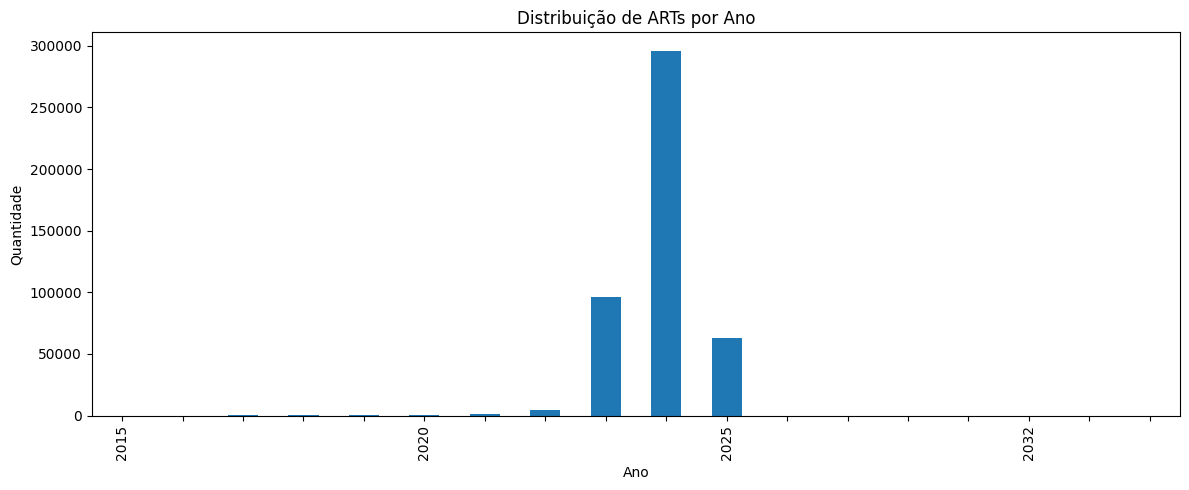

In [19]:
start_by_year = arts_data_2015['Start Date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 5))
ax = start_by_year.plot(kind='bar')
plt.title('Distribuição de ARTs por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Mostrar apenas 1 a cada N rótulos 
for i, label in enumerate(ax.get_xticklabels()):
    if i % 5 != 0:
        label.set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\celso\AppData\Local\Temp\ipykernel_20392\918145612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')


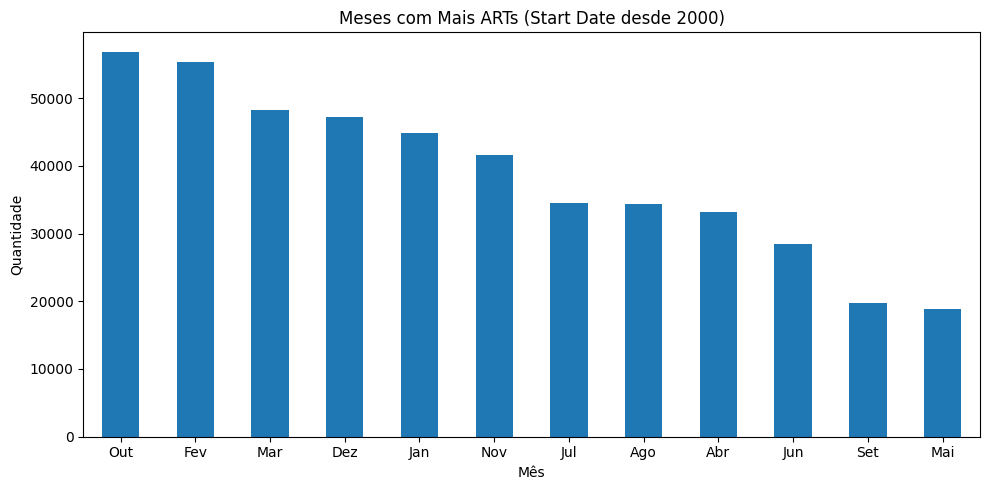

In [20]:
arts_data['Start Date'] = pd.to_datetime(arts_data['Start Date'], errors='coerce')
arts_data_2015 = arts_data[arts_data['Start Date'].dt.year >= 2015].copy()
arts_data_2015['Mes'] = arts_data_2015['Start Date'].dt.month


frequencia_por_mes = arts_data_2015['Mes'].value_counts().sort_values(ascending=False)

nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
frequencia_por_mes.index = [nomes_meses[i - 1] for i in frequencia_por_mes.index]

plt.figure(figsize=(10, 5))
frequencia_por_mes.plot(kind='bar')
plt.title('Meses com Mais ARTs (Start Date desde 2000)')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

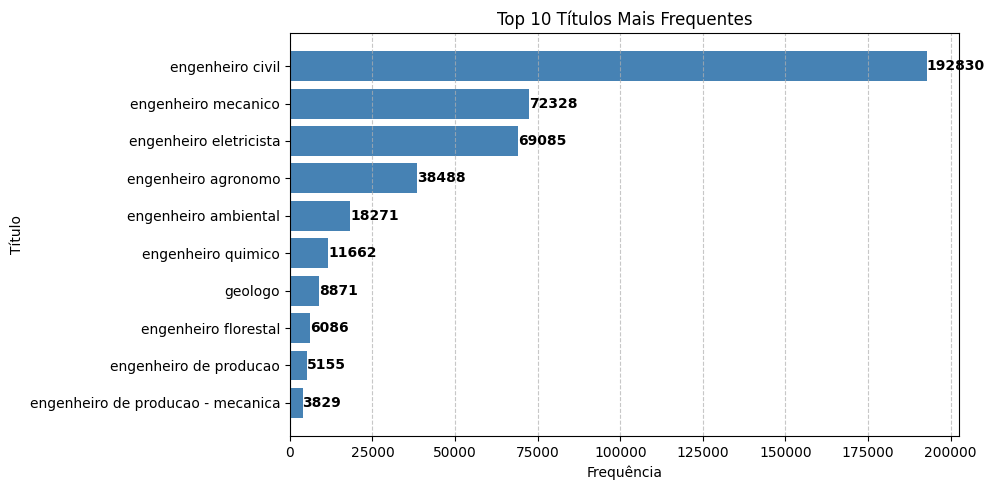

In [22]:
import matplotlib.pyplot as plt

# Verificar os valores mais frequentes da coluna 'Title'
top_titles = arts_data['Title'].value_counts().head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.barh(top_titles.index[::-1], top_titles.values[::-1], color='steelblue')
plt.title('Top 10 Títulos Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Título')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar os valores nas barras
for i, v in enumerate(top_titles.values[::-1]):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


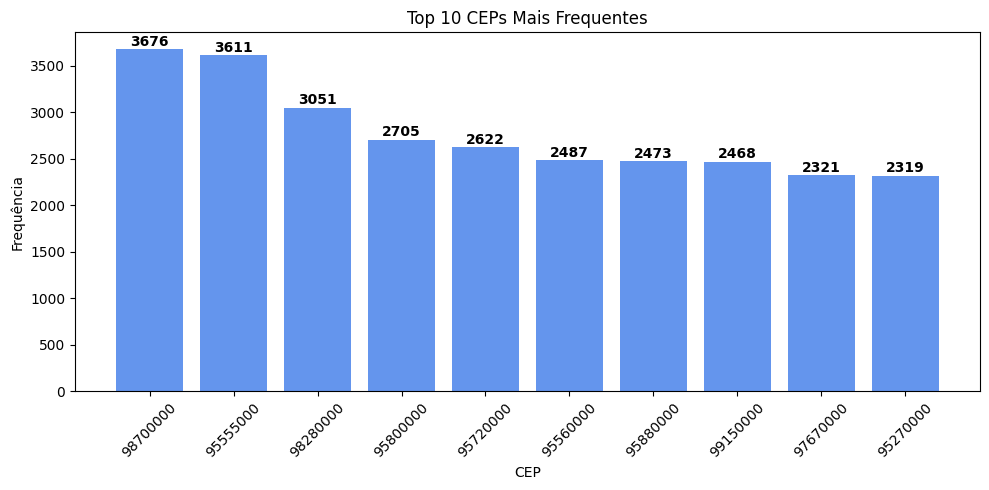

In [ ]:
import matplotlib.pyplot as plt

# Filtrar CEPs válidos (remover nulos e CEP = 0, se necessário)
ceps_validos = arts_data['CEP'].dropna()
ceps_validos = ceps_validos[ceps_validos != 0].astype(str)

# Contar os mais comuns
top_ceps = ceps_validos.value_counts().head(10)

# Plotar
plt.figure(figsize=(10, 5))
bars = plt.bar(top_ceps.index.astype(str), top_ceps.values, color='cornflowerblue')
plt.title('Top 10 CEPs Mais Frequentes')
plt.xlabel('CEP')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Adicionar valores sobre as barras
for i, v in enumerate(top_ceps.values):
    plt.text(i, v + max(top_ceps.values)*0.01, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


#TOP1 = IJUÍ, RS
#TOP2 = CAPÃO DA CANOA, RS
#TOP3 = PANAMBI, RS